In [250]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.models import Sequential

In [283]:
train=pd.read_csv("veriler\datathon\\train.csv")
sample=pd.read_csv("veriler\datathon\\sample_solution.csv")
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [252]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tarih              227520 non-null  object 
 1   ürün               227520 non-null  object 
 2   ürün besin değeri  227520 non-null  int64  
 3   ürün kategorisi    227520 non-null  object 
 4   ürün fiyatı        227520 non-null  float64
 5   ürün üretim yeri   227520 non-null  object 
 6   market             227520 non-null  object 
 7   şehir              227520 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB


In [253]:
train.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [267]:
sutunisimler=["tarih","urun","besin","kategori","fiyat","uretimyeri","market","sehir"]
train.columns=sutunisimler

In [255]:
one_hot = pd.get_dummies(train[['tarih','urun','uretimyeri','market','sehir']])
train = train.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)
train = train.join(one_hot)

In [256]:
train.head()

,fiyat,tarih_2016-01-01,tarih_2016-02-01,tarih_2016-03-01,tarih_2016-04-01,tarih_2016-05-01,tarih_2016-06-01,tarih_2016-07-01,tarih_2016-08-01,tarih_2016-09-01,...,market_C,market_M,sehir_A,sehir_B,sehir_C,sehir_D,sehir_E,sehir_F,sehir_G,sehir_H
0,33.41,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,11.22,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,11.12,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,7.02,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,13.14,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [257]:
y=train.iloc[:,0:1]
x = train.drop(['fiyat'],axis = 1)

In [258]:
y.head()

,fiyat
0,33.41
1,11.22
2,11.12
3,7.02
4,13.14


In [259]:
x.head()

,tarih_2016-01-01,tarih_2016-02-01,tarih_2016-03-01,tarih_2016-04-01,tarih_2016-05-01,tarih_2016-06-01,tarih_2016-07-01,tarih_2016-08-01,tarih_2016-09-01,tarih_2016-10-01,...,market_C,market_M,sehir_A,sehir_B,sehir_C,sehir_D,sehir_E,sehir_F,sehir_G,sehir_H
0,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [260]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [261]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [262]:
model=Sequential()
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1))

In [263]:
model.compile(optimizer="Adam",loss="mse")

In [264]:
model.fit(x_train,y_train,epochs=25,validation_split=0.1)

Epoch 1/25
4288/4288 [==============================] - 25s 6ms/step - loss: 7.4554 - val_loss: 3.1859
Epoch 2/25
4288/4288 [==============================] - 29s 7ms/step - loss: 2.5343 - val_loss: 3.0195
Epoch 3/25
4288/4288 [==============================] - 29s 7ms/step - loss: 1.9739 - val_loss: 1.4251
Epoch 4/25
4288/4288 [==============================] - 28s 7ms/step - loss: 1.4423 - val_loss: 0.9223
Epoch 5/25
4288/4288 [==============================] - 29s 7ms/step - loss: 1.1428 - val_loss: 3.9888
Epoch 6/25
4288/4288 [==============================] - 30s 7ms/step - loss: 0.9312 - val_loss: 0.9077
Epoch 7/25
4288/4288 [==============================] - 29s 7ms/step - loss: 0.7805 - val_loss: 0.6719
Epoch 8/25
4288/4288 [==============================] - 30s 7ms/step - loss: 0.6814 - val_loss: 0.5594
Epoch 9/25
4288/4288 [==============================] - 30s 7ms/step - loss: 0.5898 - val_loss: 0.7868
Epoch 10/25
4288/4288 [==============================] - 28s 7ms/step - l

<AxesSubplot:>

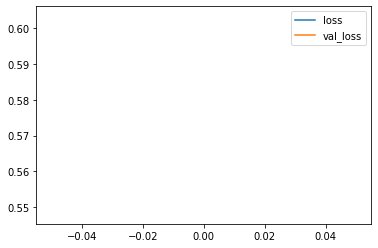

In [212]:
history=pd.DataFrame(model.history.history)
history.plot()

In [213]:
model.evaluate(x_test,y_test)

2347/2347 [==============================] - 7s 3ms/step - loss: 0.6030


0.6030251979827881

In [214]:
testTahminleri=model.predict(x_test)
len(testTahminleri)

75082

In [215]:
tahmin=pd.DataFrame(y_test.values)
testTahminleri= pd.Series(testTahminleri.reshape(75082,))
tahminDf=pd.concat([tahmin,testTahminleri],axis=1)
tahminDf.columns=["Gerçek Değer","Test Sonucu"]

In [216]:
tahminDf.head(20)

,Gerçek Değer,Test Sonucu
0,14.76,15.218136
1,6.19,6.983631
2,38.22,38.436371
3,9.84,9.309937
4,7.64,8.034830
5,27.07,26.743624
6,20.08,21.794407
7,19.69,19.814129
8,12.82,12.896793
9,19.25,19.074570


In [217]:
tumveriler=testTahminleri

In [218]:
type(tumveriler)

pandas.core.series.Series

In [219]:
tahminDf.iloc[:,:-1].sum()

Gerçek Değer    1228997.21
dtype: float64

In [220]:
tahminDf.iloc[:,1:].sum()

Test Sonucu    1228344.125
dtype: float32

In [221]:
model.save('veriler\datathon\\260130')

INFO:tensorflow:Assets written to: veriler\datathon\260130\assets


In [242]:
new_model = tf.keras.models.load_model('veriler\datathon\\260130')

In [245]:
test.head()

,id,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir
0,0,2021-01-01,kıyma,120,et,Yurt içi,M,A
1,1,2021-01-01,tavuk,103,et,Yurt içi,M,A
2,2,2021-01-01,hindi,160,et,Yurt içi,M,A
3,3,2021-01-01,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,M,A
4,4,2021-01-01,Bakla-taze,72,sebze ve bakliyat,Yurt içi,M,A


In [246]:
test=test.drop('id',axis=1)

In [247]:
sutunisimler=["tarih","urun","besin","kategori","uretimyeri","market","sehir"]
test.columns=sutunisimler

In [248]:
one_hot = pd.get_dummies(test[['tarih','urun','uretimyeri','market','sehir']])
test = test.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)
test= test.join(one_hot)

In [ ]:
one_hot = pd.get_dummies(train[['tarih','urun','uretimyeri','market','sehir']])
train = train.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)
train = train.join(one_hot)

In [249]:
test.head()

,tarih_2021-01-01,tarih_2021-02-01,tarih_2021-03-01,tarih_2021-04-01,tarih_2021-05-01,tarih_2021-06-01,tarih_2021-07-01,tarih_2021-08-01,tarih_2021-09-01,tarih_2021-10-01,...,market_C,market_M,sehir_A,sehir_B,sehir_C,sehir_D,sehir_E,sehir_F,sehir_G,sehir_H
0,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [240]:
scaler = MinMaxScaler()
scaler.fit(test)
test = scaler.transform(test)

In [243]:
testTahminleri=new_model.predict(test)
len(testTahminleri)

ValueError: in user code:

    File "C:\Users\dogru\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\dogru\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\dogru\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\dogru\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\dogru\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\dogru\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 152), found shape=(32, 110)


In [137]:
testTahminleri= pd.Series(testTahminleri.reshape(45504,))

In [145]:
testTahminleri.to_csv('veriler\datathon\sonuclar\\sonuc2.csv')

In [146]:
deneme=pd.read_csv('veriler\datathon\sonuclar\\sonuc2.csv')

In [1]:
deneme.head(20)

NameError: name 'deneme' is not defined

In [148]:
sutunisimler=["id","ürün fiyatı"]
deneme.columns=sutunisimler

In [151]:
deneme.to_csv('veriler\datathon\sonuclar\\sonuc.csv',index=False)

In [284]:
test=test.drop('id',axis=1)

In [285]:
sutunisimler=["tarih","urun","besin","kategori","uretimyeri","market","sehir"]
test.columns=sutunisimler

In [286]:
one_hot = pd.get_dummies(test[['tarih','urun','uretimyeri','market','sehir']])
test = test.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

test = test.join(one_hot)
test.rename(columns={'tarih_2021-01-01': 'ocak', 'tarih_2021-02-01': 'subat', 'tarih_2021-03-01': 'mart'
                        , 'tarih_2021-04-01': 'nisan', 'tarih_2021-05-01': 'mayis', 'tarih_2021-06-01': 'haziran'
                        , 'tarih_2021-07-01': 'temmuz', 'tarih_2021-08-01': 'agustos', 'tarih_2021-09-01': 'eylul'
                        , 'tarih_2021-10-01': 'ekim', 'tarih_2021-11-01': 'kasim', 'tarih_2021-12-01': 'aralik'}, inplace=True)

In [287]:
test.head()

,ocak,subat,mart,nisan,mayis,haziran,temmuz,agustos,eylul,ekim,...,market_C,market_M,sehir_A,sehir_B,sehir_C,sehir_D,sehir_E,sehir_F,sehir_G,sehir_H
0,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
